In [1]:
%cd ..

/Users/danorel/Workspace/Education/Self-Education/Programming/AI/MuJoCo/rlab


In [2]:
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import mediapy as media
import numpy as np
import time

In [3]:
m = mujoco.MjModel.from_xml_path("tutorial/models/chaotic_pendulum.xml")
d = mujoco.MjData(m)

In [4]:
renderer = mujoco.Renderer(m) 

In [5]:
duration = 5
fps = 60

frames = []

mujoco.mj_resetData(m, d)
d.joint('root').qvel = 10

while d.time < duration:
    mujoco.mj_step(m, d)
    if len(frames) < d.time * fps:
        renderer.update_scene(d, camera="fixed")
        pixels = renderer.render()
        frames.append(pixels)
media.show_video(frames, fps=fps)

In [6]:
duration = 6
fps = 30

frames = []
n_frames = int(duration * fps)
simulator_steps = 0
simulator_time = 0
rendering_steps = 0
rendering_time = 0

mujoco.mj_resetData(m, d)
d.joint('root').qvel = 10

for i in range(n_frames):
    while d.time * fps < i:
        tic = time.time()
        mujoco.mj_step(m, d)
        simulator_time += time.time() - tic
        simulator_steps += 1
    tic = time.time()
    renderer.update_scene(d, camera="fixed")
    frame = renderer.render()
    rendering_time += time.time() - tic
    rendering_steps += 1
    frames.append(frame)

simulator_time_avg = 1e6 * simulator_time / simulator_steps
simulator_fps_avg = simulator_steps / simulator_time
print(f"Simulator time = {simulator_time_avg:5.3g} μs/simulation (fps={simulator_fps_avg:5.0f}Hz)")

rendering_time_avg = 1e6 * rendering_time / rendering_steps
rendering_fps_avg = rendering_steps / rendering_time
print(f"Rendering time = {rendering_time_avg:5.3g} μs/frame (fps={rendering_fps_avg:5.0f}Hz)")

media.show_video(frames, fps=fps)

Simulator time =  7.41 μs/simulation (fps=134882Hz)
Rendering time = 3.17e+03 μs/frame (fps=  316Hz)


/var/folders/rp/5xgdthw53sn2b8gbxv7b0r240000gp/T/ipykernel_63718/3593251458.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angles[i] = d.joint('root').qpos


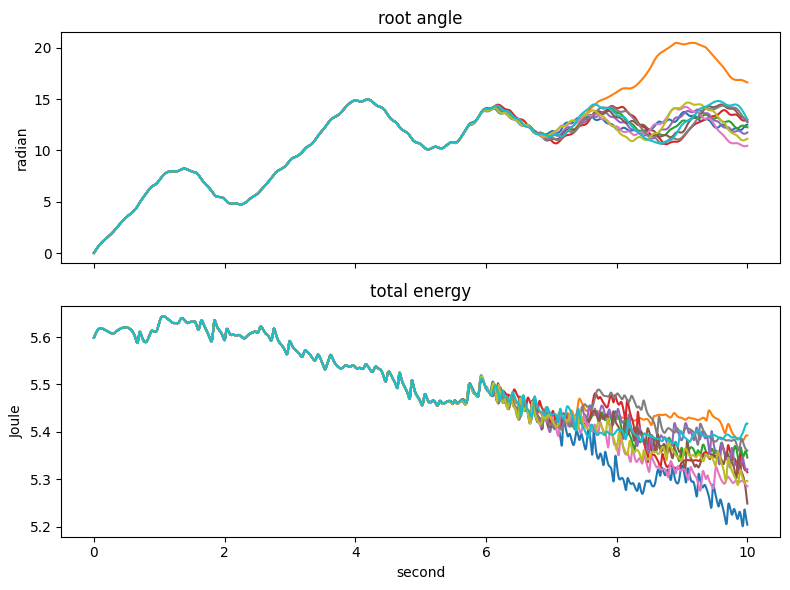

In [7]:
duration = 10
repeats = 10
perturbation = 1e-7

n_steps = int(duration / m.opt.timestep)
timevals = np.zeros(n_steps)
angles = np.zeros(n_steps)
energies = np.zeros(n_steps)

_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for _ in range(repeats):
    mujoco.mj_resetData(m, d)
    d.qvel[0] = 10 # root joint velocity
    d.qvel[:] += perturbation * np.random.randn(m.nv)

    for i in range(n_steps):
        mujoco.mj_step(m, d)
        timevals[i] = d.time
        angles[i] = d.joint('root').qpos
        energies[i] = d.energy[0] + d.energy[1]

    ax[0].plot(timevals, angles)
    ax[1].plot(timevals, energies)

ax[0].set_title('root angle')
ax[0].set_ylabel('radian')
ax[1].set_title('total energy')
ax[1].set_ylabel('Joule')
ax[1].set_xlabel('second')
plt.tight_layout()

Steps 1000 per timestep 10ms
Simulator time = 0.0098s
Steps 5623 per timestep 1.8ms
Simulator time = 0.052s
Steps 31622 per timestep 0.32ms
Simulator time = 0.3s
Steps 177827 per timestep 0.056ms
Simulator time = 1.7s
Steps 999999 per timestep 0.01ms
Simulator time = 9.8s


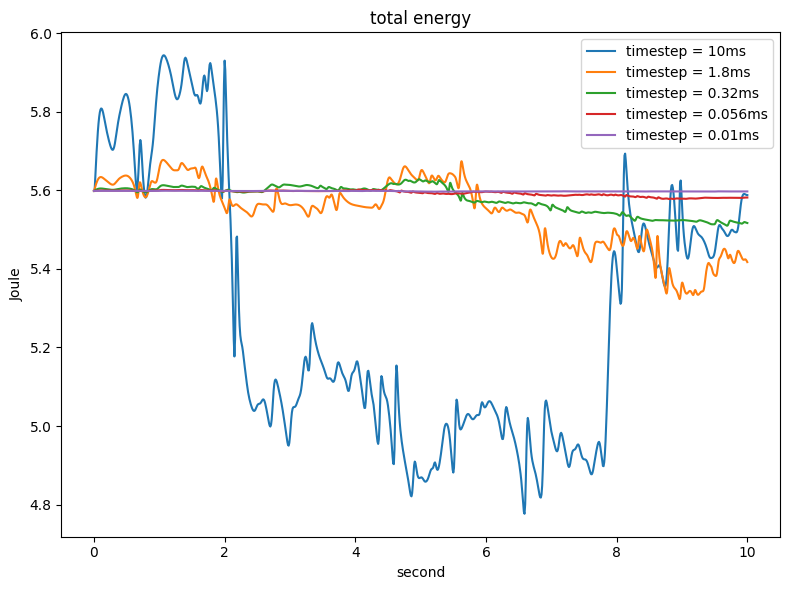

In [8]:
duration = 10
repeats = 10
timesteps = np.pow(10, np.linspace(-2, -5, 5))

_, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

for timestep in timesteps:
    m.opt.timestep = timestep

    n_steps = int(duration / timestep)
    timevals = np.zeros(n_steps)
    energies = np.zeros(n_steps)

    mujoco.mj_resetData(m, d)
    d.qvel[0] = 10 # root joint velocity

    print(f"Steps {n_steps} per timestep {timestep*1e3:2.2g}ms")
    tic = time.time()
    for i in range(n_steps):
        mujoco.mj_step(m, d)
        timevals[i] = d.time
        energies[i] = d.energy[0] + d.energy[1]
    simulator_time = time.time() - tic
    print(f"Simulator time = {(simulator_time):2.2g}s")
    
    ax.plot(timevals, energies, label=f"timestep = {timestep*1e3:2.2g}ms")

ax.set_title('total energy')
ax.set_ylabel('Joule')
ax.set_xlabel('second')
ax.legend(frameon=True)
plt.tight_layout()